In [1]:
## Pretty Output
import warnings
warnings.filterwarnings("ignore")
from rich import pretty
pretty.install()
from rich.traceback import install
install(show_locals=False)
import numpy as np
import time
from tqdm.auto import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import copy
import gym

In [2]:
import stable_baselines3
stable_baselines3.get_system_info()
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

OS: macOS-12.6-arm64-arm-64bit Darwin Kernel Version 21.6.0: Mon Aug 22 20:19:52 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T6000
Python: 3.8.13
Stable-Baselines3: 1.6.0
PyTorch: 1.12.1
GPU Enabled: False
Numpy: 1.23.3
Gym: 0.21.0



In [3]:
from src.main import env_v1, env_v2, GameManager, Game

In [4]:
games = GameManager(fieldsize=40, fooditems=50)

In [5]:
id_ = games.newGame()

In [6]:
check_env_v2 = env_v2(
    "name",
    manager = games,
    game_id = id_,
    others = [],
    viewdistance=10,
    admin=True,
)
check_env(check_env_v2)

In [7]:
render_env: env_v2 = env_v2(
    "name",
    manager = games,
    game_id = id_,
    others = [],
    viewdistance=10,
    admin=True,
)
env = DummyVecEnv([lambda: render_env])
env: VecNormalize = VecNormalize.load(f"./saved/nrom_for_dqn_best.pkl", env)
#  do not update them at test time
env.training = False
# reward normalization is not needed at test time
# env.norm_reward = False
model = DQN.load(f"./saved/dqn_best", env = env)

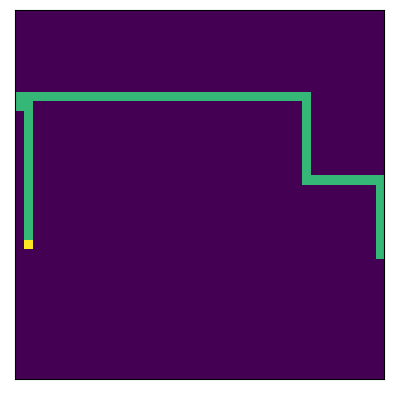

In [8]:
from matplotlib import pyplot as plt
# %matplotlib ipympl
from celluloid import Camera
from IPython.display import HTML
# plt.ion()
rewards = []
obs = env.reset()
action = [-1]
fig = plt.figure()
camera = Camera(fig)
for _ in range(1000):
  obs, reward, done, info = env.step(action)
  action, _states = model.predict(obs, deterministic=True)
  obs = env.get_original_obs()
  reward = env.get_original_reward()
  info = info[0]
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  game: Game = env.get_attr(attr_name="game")[0]
  O = copy.deepcopy(game.base.field)
  try:
    x = info["x"]
    y = info["y"]
    O[x][y] = 3
  except:
    pass
  plt.imshow(O)
  # plt.show()
  camera.snap()
  rewards.append(reward[0])
  if done:
    obs = env.reset()
    rewards = []
    break
animation = camera.animate()

In [9]:
HTML(animation.to_html5_video())

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAB7nxtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj01IHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAQ
imWIhAAS//73rd+BTcBA7Wu6Vzi0y6uUND1R9pSmeLZIAAADAAADAAAP8M2+n1EV15emAAADAH4A
EjsL/Bnv/iA6mj0zYDdp0WY3RtZQmjr43tkFc85v1zqv5QJrdPjl9wHXCz2LDh5VAA3mxBi/xgvP
1gl9g6K5t9ZNHZ3MpUbZQy8x8m1ouHOwZpzt8zDsrlseimDV0yGbFmSb+WeS9KrxcBSjS3J4Zohg
TZ3t4yvQE96Bpfb1bgs9edeZxXlPc31enDPUDQ5u7MLVgZJIrs0d0yy4wzPe/h7nDebJmhytLj1x
UizTRrXdxgdHSmwEFUvqEQqaVebPvBON7/16c3aLQRcdHUPpnpyhi+SS27fZGrmdNj4p421v4+d0
uBR/2r1kHuRj1NHkfktaXwPJVqOMqDxTeNZlTg2FCD9npzNsckpFr7AfaGhwu+Trbi+s4vyBTpcB
AzqThFLnF+VL3tJUHf5nvrEsdc0mGmyeP3Kfxtb8+XXDuPflKky1WN2vgSLlU8q+3DK4gVE6IukP
hpAVU077NuTnkPEyWMRnu8M5B6QcZO50i5Xbn20yyVk+BMZZG45XsZ/tF0U6cZ4vlhRKYoAX5D1x
oGzo8zFNRs/G3GDp2UwoujrLcyDGxZtjPSITaokEthaj5Qa+4Mbn5WTxLD4XAbhef2PndAAMM8Qz
Wg9dNtIXw0PgNMBBaJTzlar/+BpnAORe6Jy7995tPUR84exymfa/0RZrSeDyACeobCXCNJfeEzMm
QnM6LGvqddq9oiyTvSAQy8w/I5V9i0IQce5mJZsWZSMWPHWGvH9HXp5b9kOwsd4JMe9hddduuqzN
xBsd8gDS3aCzJ/jnj77s7U3S3w/4Aiq0WIkEvFlBmzfKvUEDMGZYl0TKh7/q8Ah4WelPa8PGGMru
As0MX72vqGwcdVZx1oW6+bjyy/yKNxALH2phIf1nk0C4SxOB4jNkcOw3k1WWQTJZJLnf1aqgYsm3
ig2x+N+SZqp5JAK50LEXoea4gjRC7sW+XiUIYlEncaxAi2+7S6yxqaeLnCa8j4LqvCk56iTC+IMs
594KNNzOZGBnOsTZbTBVbErJJX+cRcFj3XW9r1D4SxU1c+7w47LyeVWjLRi7DLlOcgBsVc2xOiEu
d7F37S7cw37Q480bdbBWHt/gohGph8bwlArHIADfriQhj4JYT4pTTeMugn3LdYV/HakUfBGkI3vH
xcS3FXl3jGGBxwHUtWVfU/nYhysR0H88cqfw0BglwExErUs/u/P7gR7xTYUfl7f39La000vYlt47
t9KhLDMJMr8qGg2W/q6hbScLmxD/MGG3TkjarZ/kGqQiQvESPu96TAeLinWH/hAup6HJnByFkGP/
G8ytmkvVoRJXssEq5lbGJjg35izseZZhAHwHZyO+Pow1J1bQZIxFc87ZERY9dGMH0Fm6kicspWF8
uQMF+pqMZ9gyqyz3+52sgLbTAt5vr5lCpXXgYXjGnYBoVC6Jr0c00I7FyLRaqc8iQFeYoY/KFoyI
A4cyy19ZwuG/gY2M3kvZtsR92V5PX4J6s0IktjYrhFn9ZjX32oDAOZvMwghx9C81mFt8r305XkOU
RhcC0WnOgwszNk5keJXGSGziUyi8HdYVFTA27ZG/FBnCXOKaZfLyXavXern/GMa/5BslO1VVapnc
HPgtykgqu8bhunGXVe3uStr/JUQ1jsbKv7HfV9qdaISSg+87nB6AK7t5qEwhou+aIJWV70nQj5uk
N3nvg3EL6PJnhti/5C0NWRva4PBPJyXiOTb+7yfrJDvfVgn7/+rwg+8YgBvzoI7xm1Zied5b0VbR
YvqyQaNsYrnN9/RVf065sbqgGLNDwdSD2puCadhr4RvWLvBbShV1xmcCNVK5PuizN22jGi7L8G9k
jFpIsJg/fOCssBwhGx5F2nVWXcXH4MmWZ+D3v0xOpPOnJ8mrp9/JO9dyH84mNI+9I8Eo9AZ/oP7T
4MiXP8LhP4f1MAjmyeez0CORIHOSu6GnpZmhn2slUAOGfSmkKfcqSyy342y3PBLHWO0LBKFLJsTC
l1pbNpObBHLRaM5CQnE6b64KJnTupAw656Qu2L6Io50LhlRwsExiuv7aqahPOcRG7YWjqJnq+Gyi
tuZcV5xBID51sjxk+avJhnyIj4lBuUS8K1fOsM+ikaYidWQ2XcgeqL4baHZlt8XyzuTvB4WPpo4f
09m+1lT6H1ybXvCALZhi3HDI3+E0tDP4GBgc6MxHVypfDgqrwr5yoyeUUS6CBP1LlvSXqjFtQscc
NBHx9A/sx4R09Bb77jCKYry94XtfZgx/DgE/ibmNdmiM7pdictZRCHAo9cI4QT112xzZ/9WNpRCV
v7lob8G8oFl9Bgpqq/yiTlpYKYsPxwkY0FYnpiRnNMT7iU9cwHe0kjRU2cFj7epY2SKBCyCWl4UK
wLaZvQGFQ917Au2dQrsHWS7bzChLzFW8RCUdgGSVfXgIbycyVVqviVQkAtTSCFODBWCgM8PfZfhE
b9oULM47ONN0YKeUxnfEeWvaQiROgKH97n7dW2xgZUFFRe1FbVbEISz18fwkKjJM2oFKu6fK9KC+
01+tZRFlzqPqyVFI9S1j8mLDzv7O8MjWeru58G8hlkhmpeODtF4EDm9XagqhsLZDEqE9uk6U8WLB
z4Gzj6nVRtY5ZudiR8dkv0dycVg9WT9E/ojU6/JYrzEXZ4dUclFBw2qviAEuKjgntEtBbCg1WXAC
svJoV5AKYlDwuysWiROmhIZ6Ev8NzzjKumSY6bV+MOINFAwFsOrMQTIChDg8eYBXbUHESbHiUz3p
vC9/b2J5eY4TGtYBmzxjRaHcxpiiHj+FLHdB6mhdlEcydsvEJirYmOi+oOGhVIZYonBzeJK+wx+L
PDLXjBNyIPmGxc3iq4uEd